## Generating density maps

This code generates density plots for all animals combined, for each gene

In [1]:
library(RColorBrewer)
library (cowplot)
library (reshape2)
library(gridExtra)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(plotly)
#install.packages("Cairo")

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::combine() masks gridExtra::combine()
x dplyr::filter()  masks stats::filter()
x dplyr::lag()     masks stats::lag()


Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout




In [2]:
WT1 <- read.csv('HCR_files/object_results_WT1.csv')
WT2 <- read.csv('HCR_files/object_results_WT2.csv')
WT3 <- read.csv('HCR_files/object_results_WT3.csv')
WT4 <- read.csv('HCR_files/object_results_WT4.csv')
WT5 <- read.csv('HCR_files/object_results_WT5.csv')
WT6 <- read.csv('HCR_files/object_results_WT6.csv')
WT7 <- read.csv('HCR_files/object_results_WT7.csv')
WT8 <- read.csv('HCR_files/object_results_WT8.csv')

In [3]:
WT1 <- split(WT1, f = WT1$ï..Image.File.Name)
WT1S2 <- WT1$"WT-1-S2.afi"
WT1S3 <- WT1$"WT-1-S3.afi"
WT1S4 <- WT1$"WT-1-S4.afi"
WT1S5 <- WT1$"WT-1-S5.afi"

WT2 <- split(WT2, f = WT2$ï..Image.File.Name)
WT2S2 <- WT2$"WT-2-S2.afi"
WT2S3 <- WT2$"WT-2-S3.afi"
WT2S4 <- WT2$"WT-2-S4.afi"
WT2S5 <- WT2$"WT-2-S6.afi"

WT3 <- split(WT3, f = WT3$ï..Image.File.Name)
WT3S2 <- WT3$"WT-3-S2.afi"
WT3S3 <- WT3$"WT-3-S4.afi"
WT3S4 <- WT3$"WT-3-S5.afi"
WT3S5 <- WT3$"WT-3-S6.afi"

WT4 <- split(WT4, f = WT4$ï..Image.File.Name)
WT4S2 <- WT4$"WT-4-S3.afi"
WT4S3 <- WT4$"WT-4-S4.afi"
WT4S4 <- WT4$"WT-4-S5.afi"

WT5 <- split(WT5, f = WT5$ï..Image.File.Name)
WT5S2 <- WT5$"WT-5-S3.afi"
WT5S3 <- WT5$"WT-5-S4.afi"
WT5S5 <- WT5$"WT-5-S6.afi"

WT6 <- split(WT6, f = WT6$ï..Image.File.Name)
WT6S2 <- WT6$"WT-6-S2.afi"
WT6S3 <- WT6$"WT-6-S3.afi"
WT6S4 <- WT6$"WT-6-S4.afi"
WT6S5 <- WT6$"WT-6-S5.afi"

WT7 <- split(WT7, f = WT7$ï..Image.File.Name)
WT7S3 <- WT7$"WT-7-S3.afi"
WT7S4 <- WT7$"WT-7-S4.afi"
WT7S5 <- WT7$"WT-7-S6.afi"

WT8 <- split(WT8, f = WT8$ï..Image.File.Name)
WT8S2 <- WT8$"WT-8-S2.afi"
WT8S3 <- WT8$"WT-8-S3.afi"
WT8S4 <- WT8$"WT-8-S4.afi"
WT8S5 <- WT8$"WT-8-S6.afi"

In [4]:
thresholds <- c(5,5,5,5,5,5,5,5,5,5,5,5,5,5,5)
list.dfs <- list()
count = 1

big_bind <- rbind(WT1S2, WT1S3, WT1S4, WT1S5, WT2S2, WT2S3, WT2S4, WT2S5, WT3S2, WT3S3, WT3S4, WT3S5, WT4S2, WT4S3, WT4S4, WT5S2, WT5S3, WT5S5, WT6S2, WT6S3, WT6S4, WT6S5, WT7S3, WT7S4, WT7S5, WT8S2, WT8S3, WT8S4, WT8S5)
S2_all <- rbind(WT1S2, WT2S2, WT3S2, WT4S2, WT5S2, WT6S2, WT8S2)
S3_all <- rbind(WT1S3, WT2S3, WT3S3,WT7S3, WT4S3, WT5S3, WT6S3, WT8S3)
S4_all <- rbind(WT1S4, WT2S4, WT3S4, WT4S4, WT6S4, WT7S4, WT8S4)
S5_all <- rbind(WT1S5, WT2S5, WT3S5, WT5S5, WT6S5, WT7S5, WT8S5)

In [5]:
normalize  <- function(x){
  (x - min(x)) / (max(x) - min(x))
}

In [6]:
genes <- c("drd2", "drd3","nts", "crhr2", "sst", "tacr1", "esr1", "foxp2", "vglut2", "pax6", "met", "col15a1", "samd3", "vgat", "onecut2")
files <- list(S2_all, S3_all, S4_all, S5_all)
files_as_chars <- list("S2_all", "S3_all", "S4_all", "S5_all")
list.dfs <- list()
count = 1

for (i in 1:length(files)){
  files [[i]][["YMin"]] <- files [[i]][["YMin"]]*(-1)
  for (j in 1:length(genes)){
    column_a_name <- paste0(genes[j], ".Copies")
    column_b_name <- paste0(genes[j], ".Cell.Intensity")
    df <- files[[i]][,c("XMin","YMin",column_a_name, column_b_name)]
    temp <- df[[column_a_name]] < 5
    df[[column_b_name]][temp] <- 0
    print(df)
    list.dfs[[count]] <- df
    df_id <- paste0(genes[j], "_", files_as_chars[[i]])
    print(df_id)
    names(list.dfs)[[count]]<- df_id
    count = count+1
  }
}

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
drop_zero <- function(x) {
  filter(x, x[4]>0)
}

list.dfs <- lapply(list.dfs, drop_zero)

big_list_dfs <- list()

count_2 <- 1
for (i in 1:15){
  list_2_df <- list(list.dfs[[i]], list.dfs[[i+15]], list.dfs[[i+30]], list.dfs[[i+45]])
  big_list_dfs [[count_2]] <- list_2_df
  count_2 = count_2 +1
}


[1] "white"   "#FEE7D1" "#FDD4AB" "#FDB97D" "#FD9B50" "#F77D29" "#E95E0D"
 [8] "#CD4401" "#A13403" "#7F2704"

[1] "#FFF5EB" "#FEE7D1" "#FDD4AB" "#FDB97D" "#FD9B50" "#F77D29" "#E95E0D"
 [8] "#CD4401" "#A13403" "#7F2704"

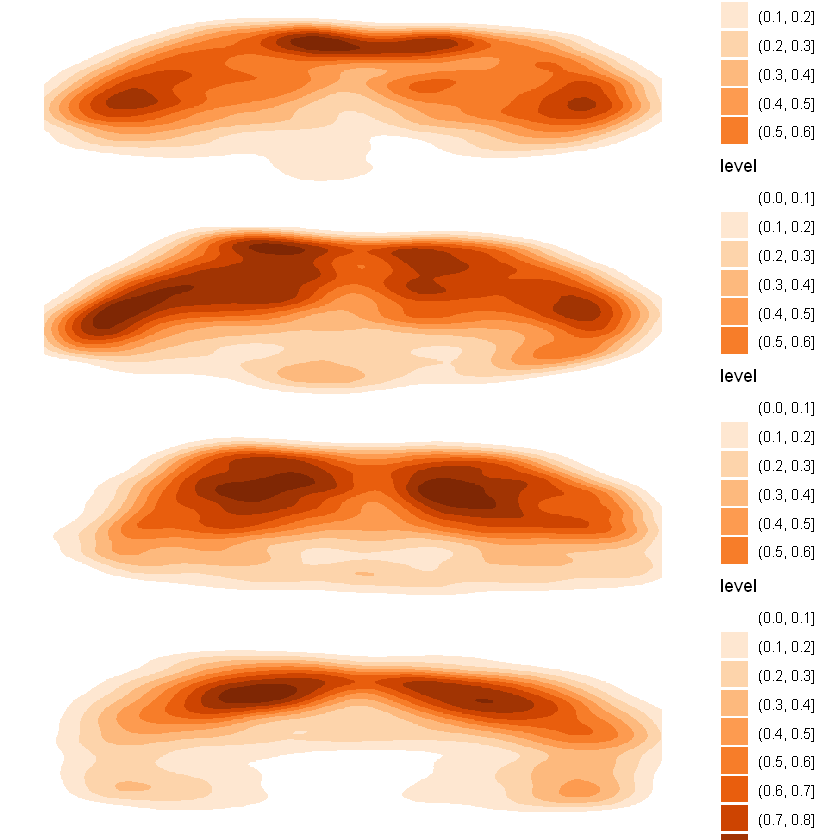

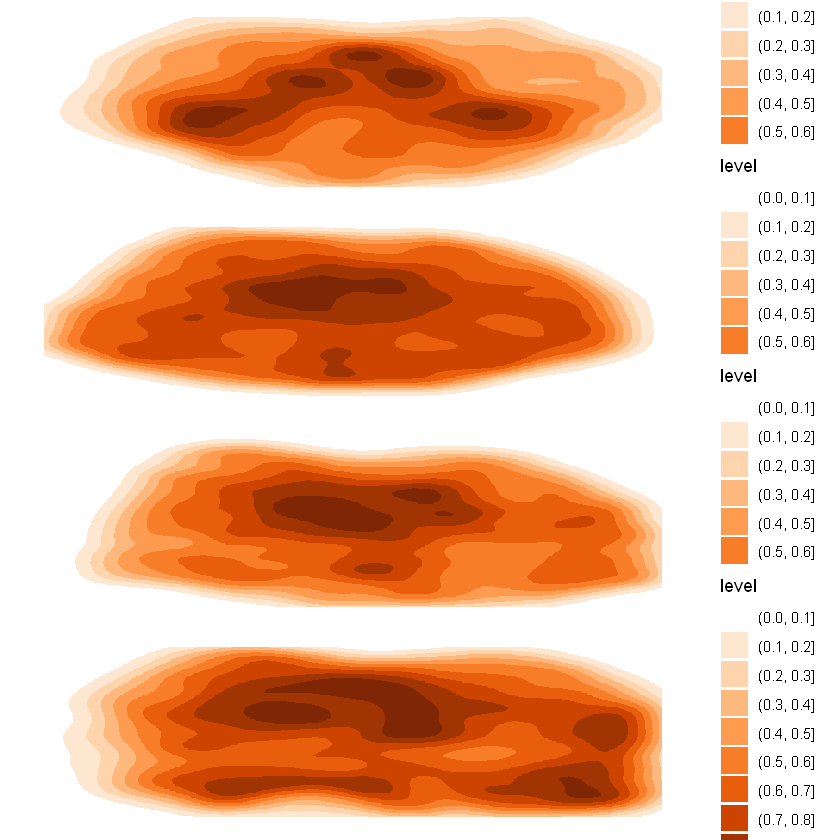

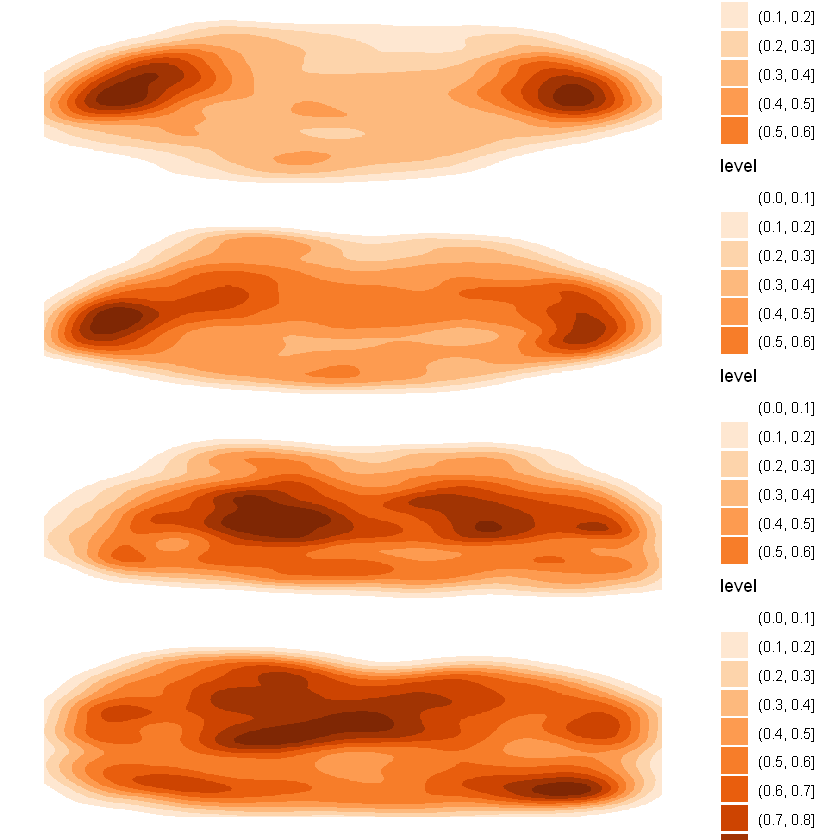

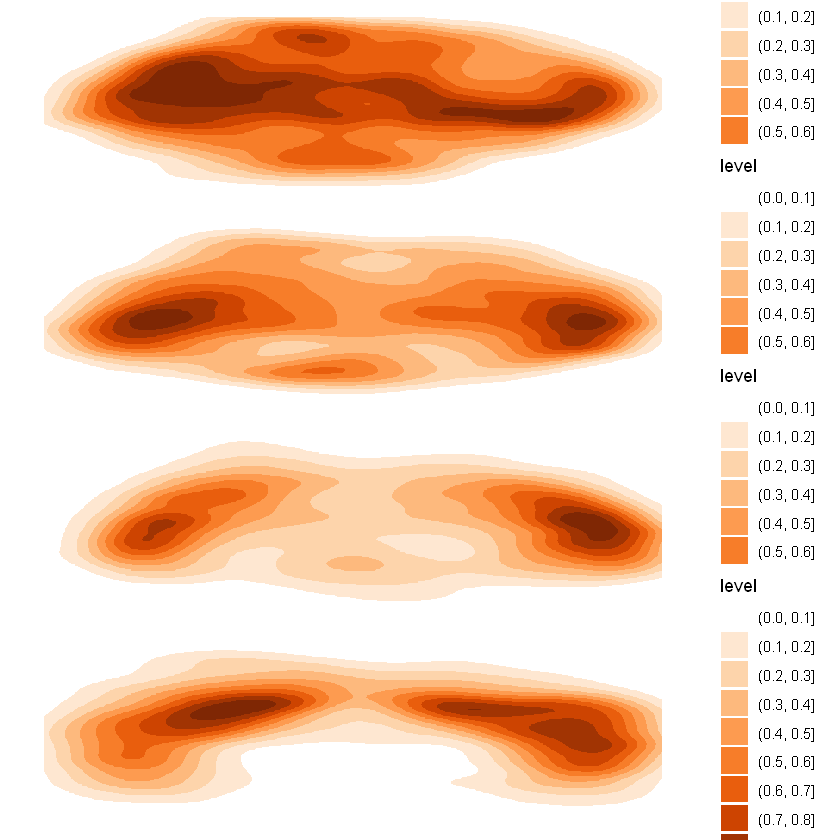

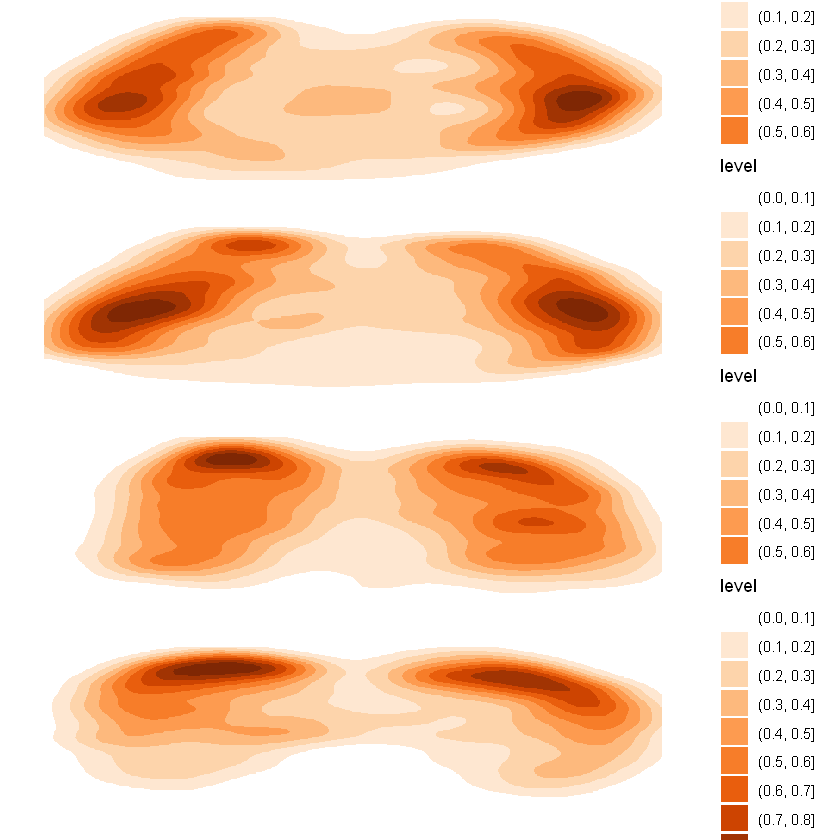

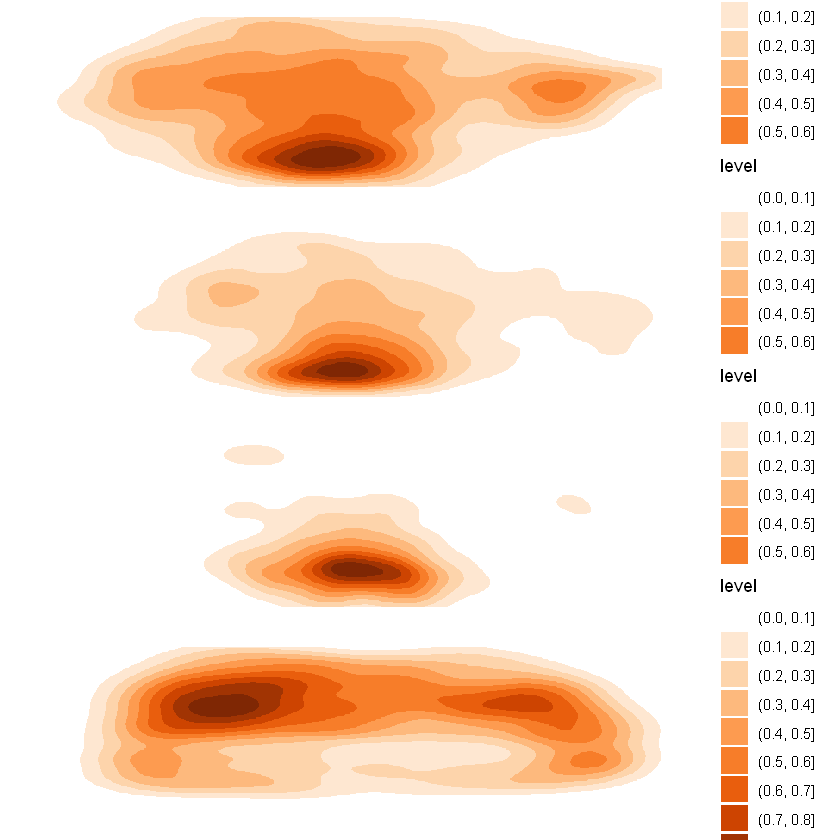

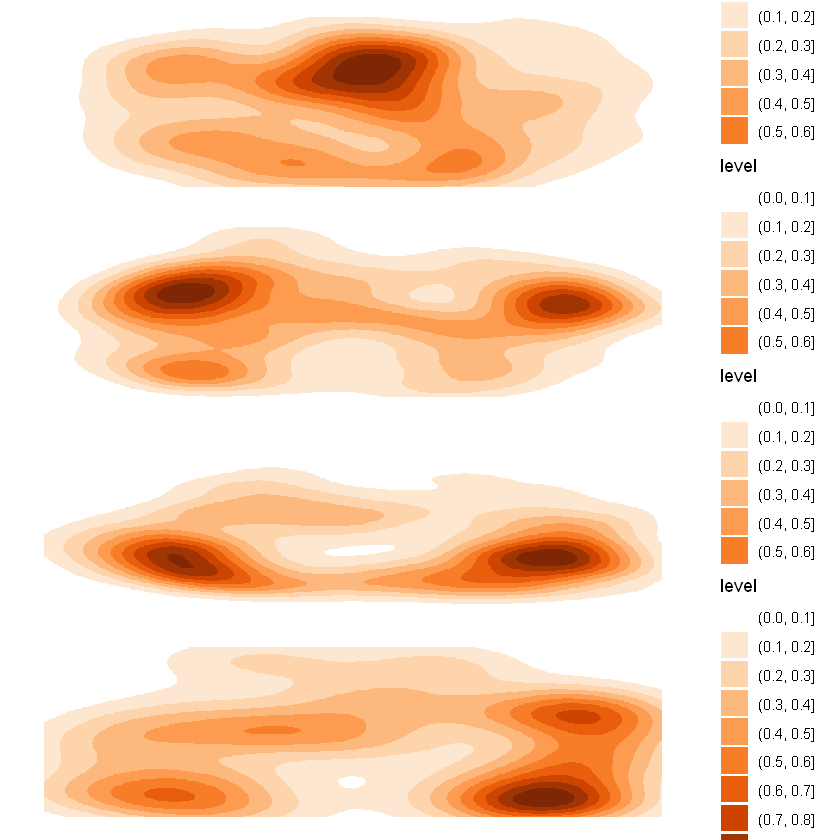

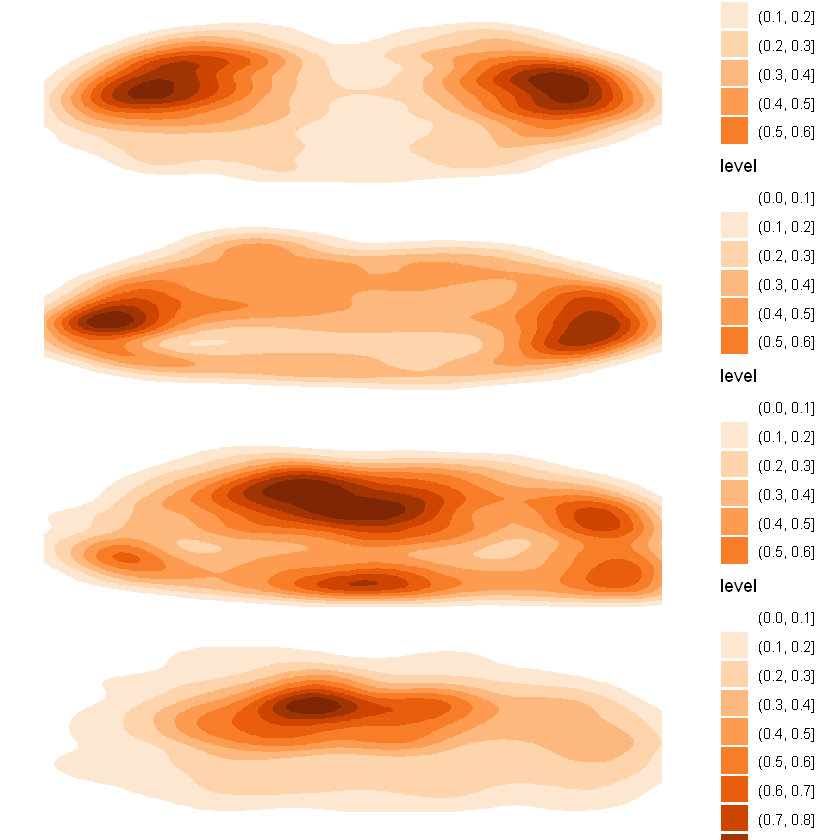

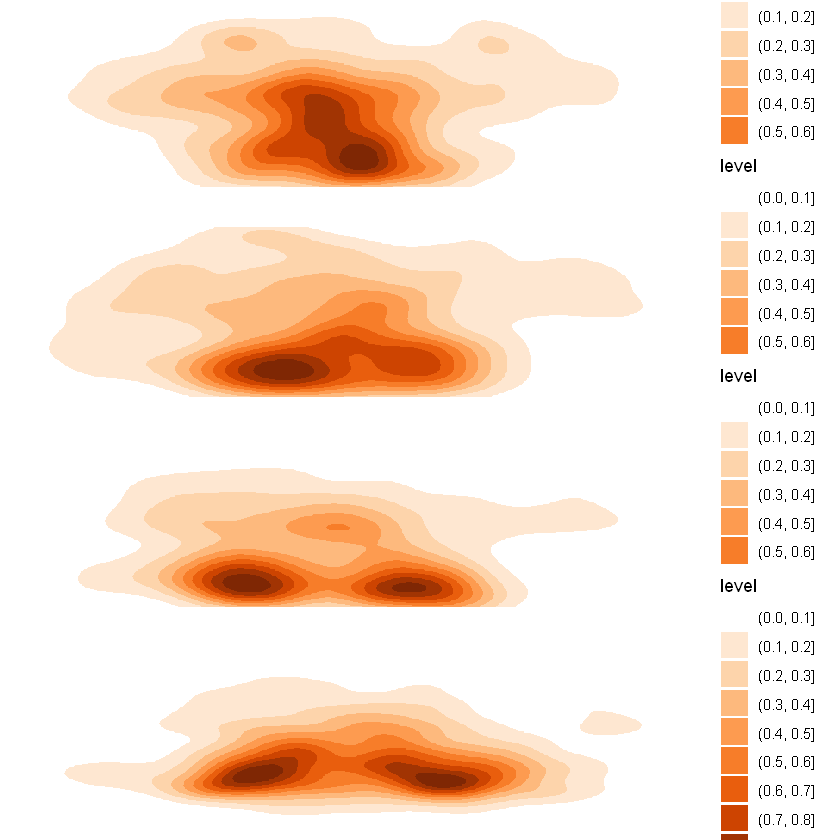

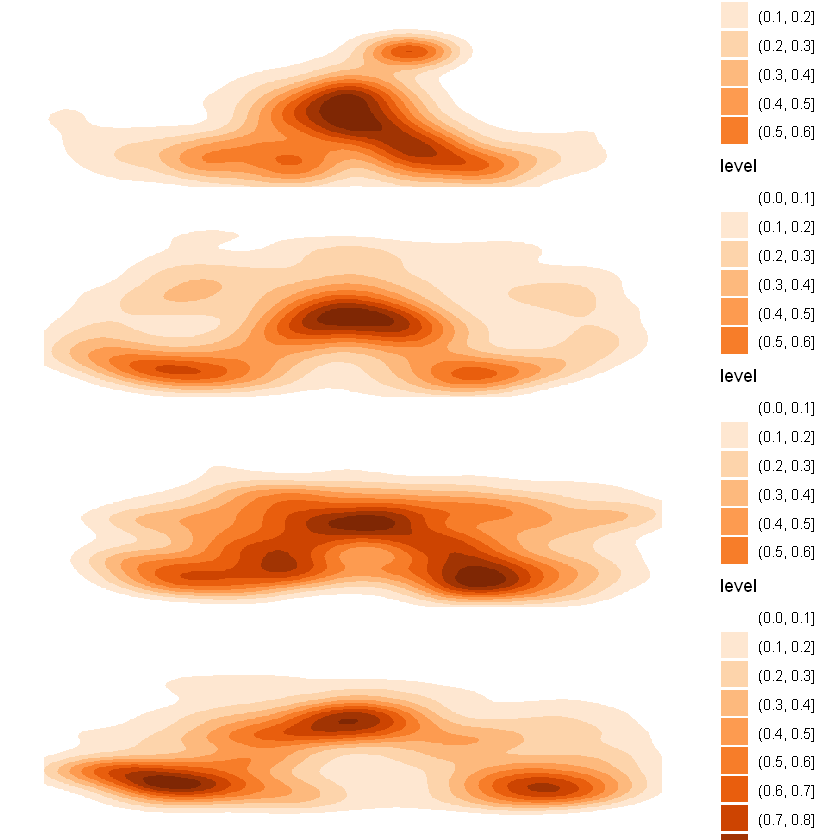

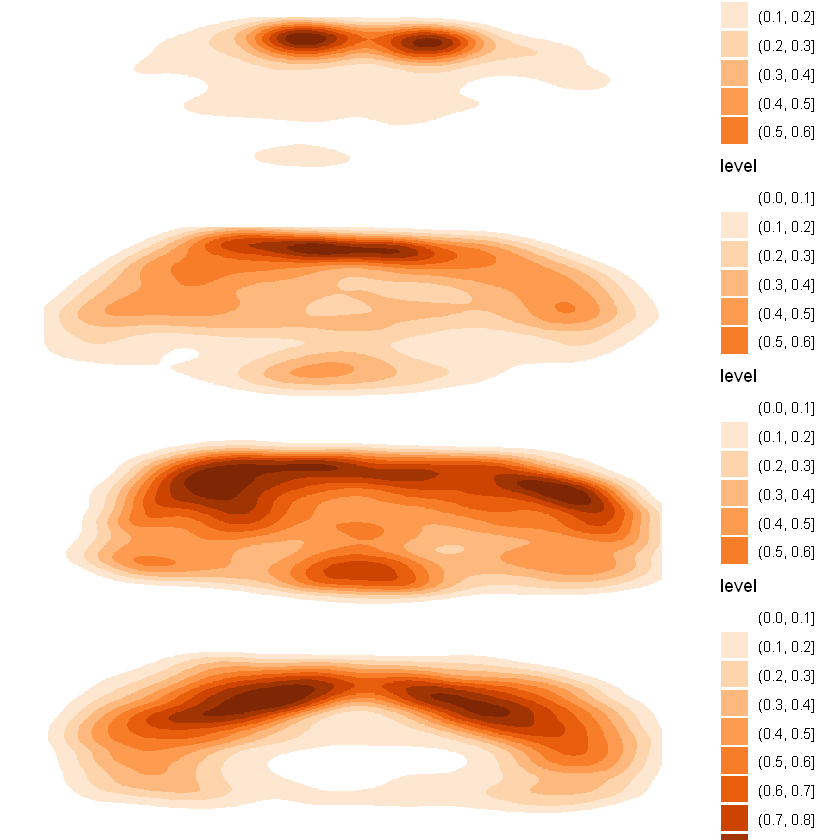

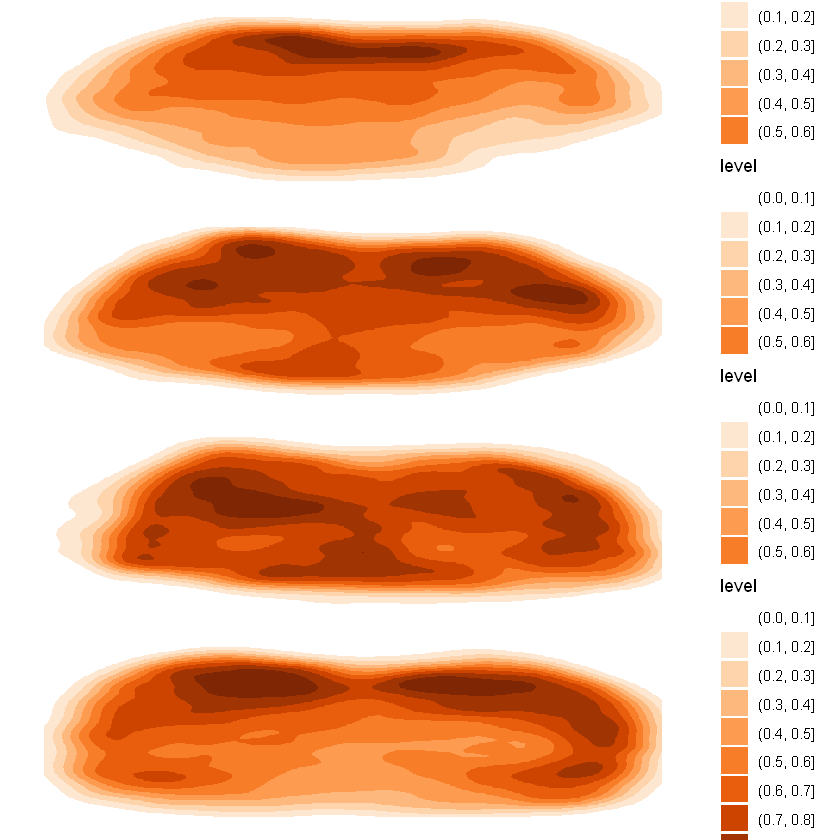

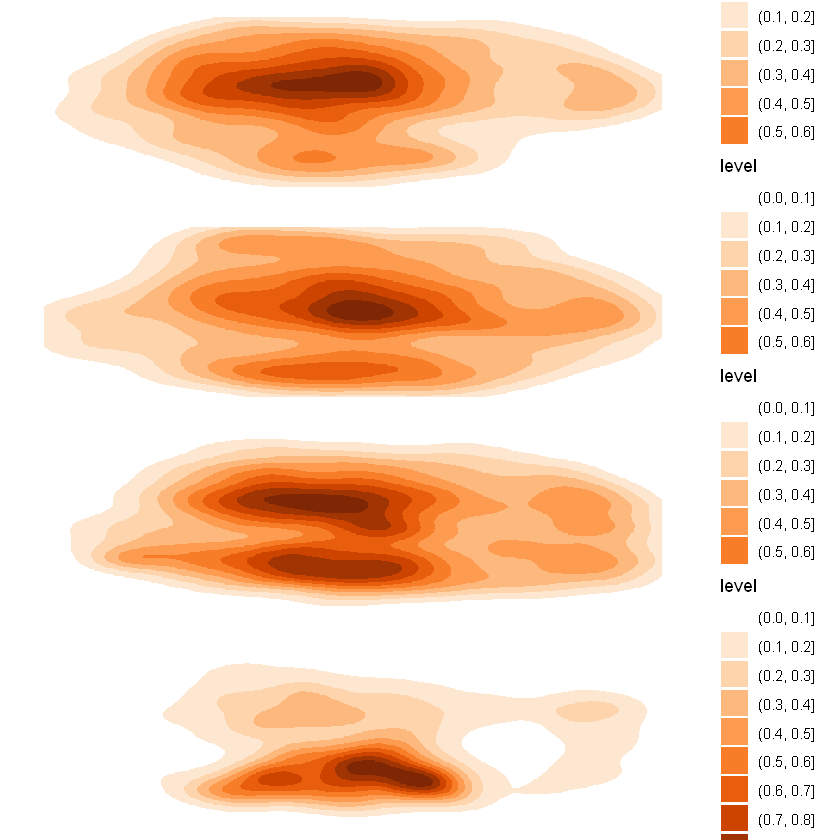

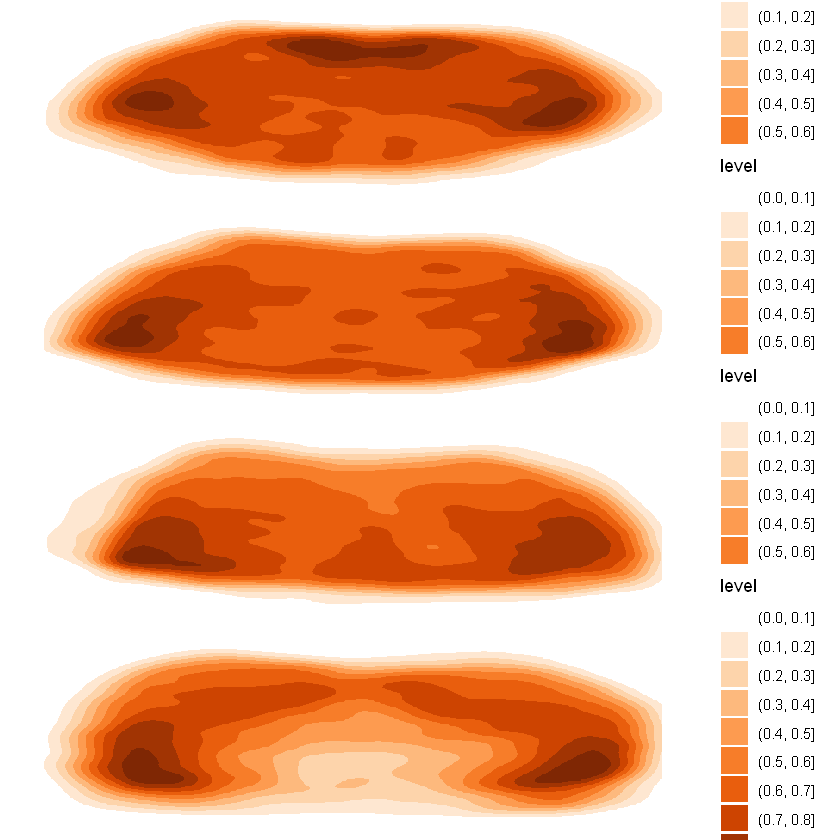

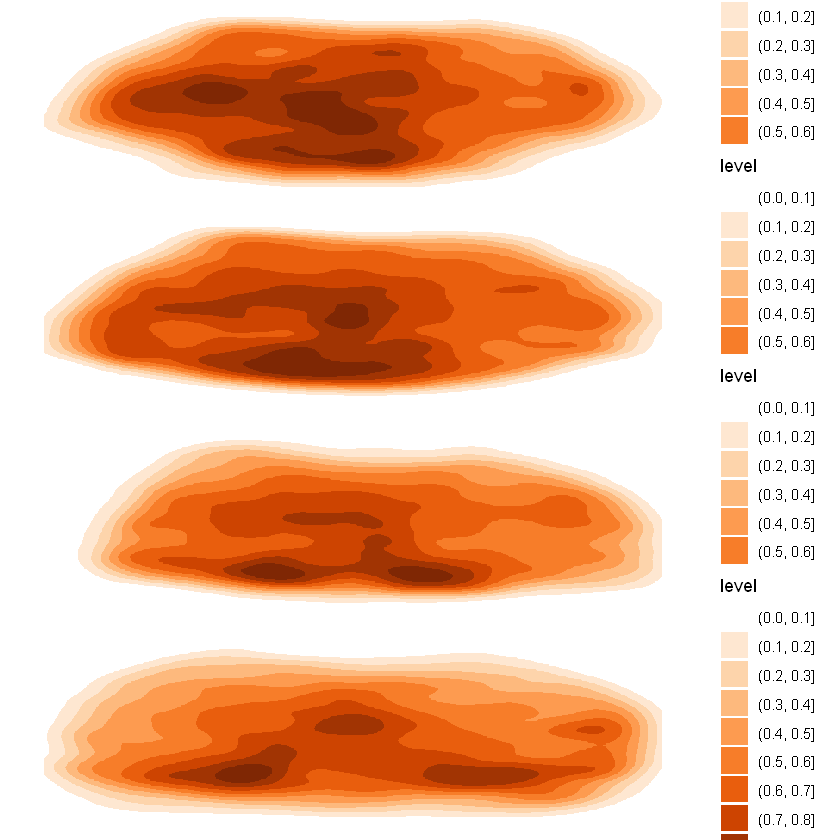

In [8]:
palette(c("#FFFFFF", "#FEE7D1", "#FDD4AB", "#FDB97D", "#FD9B50", "#F77D29", "#E95E0D", "#CD4401", "#A13403", "#7F2704"))
palette()

colourCount = 10
getPalette = colorRampPalette(brewer.pal(9, "Oranges"))
getPalette(colourCount)

make_dp <- function(df){
  ggplot() +
    geom_density_2d_filled(df, mapping = aes(x=XMin, y=YMin), show.legend = T,  contour_var = "ndensity")+
    theme_bw()+
    scale_fill_manual(values = palette())+
    theme(axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          axis.title.y=element_blank(),
          axis.text.y =element_blank(),
          axis.ticks.y=element_blank(),
          panel.background = element_blank(),
          panel.border = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          plot.title = element_text(hjust = 0.5))
}

for (i in 1: length(big_list_dfs)){
  plist = list()
  for (j in 1:length(big_list_dfs[[i]])){
    plot_1 <- make_dp(big_list_dfs[[i]][[1]])
    plot_2 <- make_dp(big_list_dfs[[i]][[2]])
    plot_3 <- make_dp(big_list_dfs[[i]][[3]])
    plot_4 <- make_dp(big_list_dfs[[i]][[4]])
  }
  new_grid <- grid.arrange(grobs = list(plot_1, plot_2, plot_3, plot_4), nrow = 4, ncol = 1)
  ggsave(filename = paste0(genes[i], ".svg"), new_grid, height = 13, width = 5)
}